In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
import time

%matplotlib inline

import pylab as pl 
from IPython import display

In [10]:
m = 100 
w = np.array([[-6], [2], [1]])
X = np.hstack([np.ones([m, 1]), 4 * np.random.rand(m, 1), 4 * np.random.rand(m, 1)])

w = np.asmatrix(w)
X = np.asmatrix(X)

y = 1 / (1 + np.exp(-X*w)) > 0.5   # sigmoid function 

C0 = np.where(y == True)[0]
C1 = np.where(y == False)[0]

y = np.empty([m,1])
y[C1] = 1
y[C0] = -1
y = np.asmatrix(y)

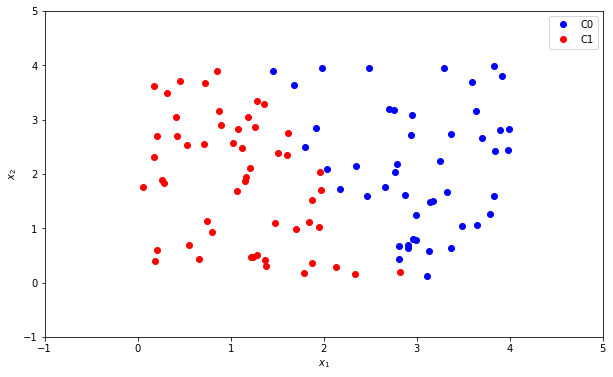

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(X[C0, 1], X[C0, 2], 'bo', label='C0')
plt.plot(X[C1, 1], X[C1, 2], 'ro', label='C1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.xlim([-1, 5])
plt.ylim([-1, 5])
plt.show()

In [16]:
# define sigmoid function 
# h == sigmoid function 

def h(x, w):
    return 1 / (1 + np.exp(-x*w))

In [17]:
w = np.zeros([3, 1])
w = np.asmatrix(w)

In [18]:
print(X.shape)
print(y.shape)
print(w.shape)

(100, 3)
(100, 1)
(3, 1)


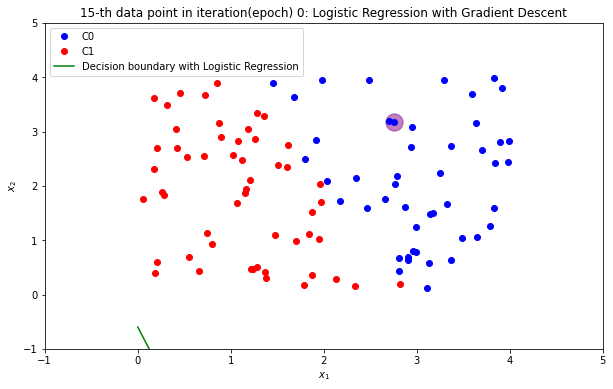

KeyboardInterrupt: 

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

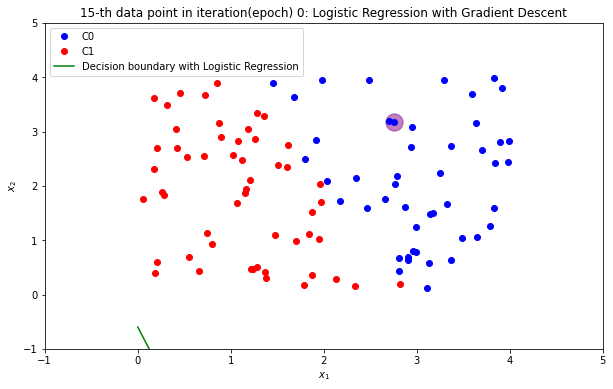

In [19]:
lr = 1e-4

for k in range(10000):
    for i in range(100):
        
        # cross-entropy gradient 
        grad = y[i, 0] * X[i, :].T * (1 / (1 + np.exp(y[i, 0]*w.T*X[i, :].T))) 
        w = w + lr * grad
        
        if k % 100 == 0:
            plt.figure(figsize=(10, 6))
            
            # plotting
            # mark current data point with purple
            pl.scatter(X[i, 1], X[i, 2], alpha=0.5, c='purple', s=300)

            # show all points
            plt.plot(X[C0, 1], X[C0, 2], 'bo', label='C0')
            plt.plot(X[C1, 1], X[C1, 2], 'ro', label='C1')

            # decision boundary
            xp = np.linspace(0, 4, 100).reshape(-1, 1)
            yp = -w[1, 0] / w[2, 0] * xp - w[0, 0] / w[2, 0]
            pl.plot(xp, yp, 'g', label='Decision boundary with Logistic Regression')

            pl.xlabel('$x_1$')
            pl.ylabel('$x_2$')
            pl.legend(loc=2)
            pl.xlim([-1, 5])
            pl.ylim([-1, 5])
            pl.title(f'{i}-th data point in iteration(epoch) {k}: Logistic Regression with Gradient Descent')

            display.clear_output(wait=True)
            display.display(pl.gcf())
            time.sleep(0.01) 

            pl.clf()
        